In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv
/kaggle/input/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv


In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor



pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format',  '{:.2f}'.format)

In [30]:
#/kaggle/input/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv

df = pd.read_csv("/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


In [31]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Info #####################")
    print(dataframe.info())

check_df(df)

##################### Shape #####################
(34857, 21)
##################### Types #####################
Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object
##################### Head #####################
       Suburb             Address  Rooms Type      Price Method SellerG       Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt         CouncilArea  Lattitude  Longtitude             Regionname  Propertycount
0  Abbotsford       68 Studley St      2    h        NaN

34857 gözlem birimi, 21 değişkenim var. Çeşitli veritipleri mevcut. Price,distance,postcode,... birçok değişkende eksik değer mevcut. memory_usage yaklaşık 6 gb. 

In [32]:
df.duplicated().sum()
#tekrar eden 1 değer var. Birbirine birebir aynı olan.

1

In [33]:
df.loc[df.duplicated(keep=False), :]
#aynı adreste 2 farkı ev olmayacağı için bu değerler yanlışlıkla 2 defa girilmiş, bunları kaldıralım.

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.40,3131.00,3.00,3.00,2.00,405.00,226.00,2000.00,Manningham City Council,-37.83,145.17,Eastern Metropolitan,4973.00
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.40,3131.00,3.00,3.00,2.00,405.00,226.00,2000.00,Manningham City Council,-37.83,145.17,Eastern Metropolitan,4973.00


In [34]:
df = df.drop_duplicates()

In [35]:
df.duplicated().sum()
#tekrar eden değerler gitmiş. 

0

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34856.00,3.03,0.97,1.00,2.00,3.00,4.00,16.00
Price,27247.00,1050173.34,641467.13,85000.00,635000.00,870000.00,1295000.00,11200000.00
Distance,34855.00,11.18,6.79,0.00,6.40,10.30,14.00,48.10
Postcode,34855.00,3116.06,109.03,3000.00,3051.00,3103.00,3156.00,3978.00
Bedroom2,26639.00,3.08,0.98,0.00,2.00,3.00,4.00,30.00
Bathroom,26630.00,1.62,0.72,0.00,1.00,2.00,2.00,12.00
Car,26128.00,1.73,1.01,0.00,1.00,2.00,2.00,26.00
Landsize,23046.00,593.61,3398.92,0.00,224.00,521.00,670.00,433014.00
BuildingArea,13741.00,160.25,401.28,0.00,102.00,136.00,188.00,44515.00
YearBuilt,15550.00,1965.29,37.33,1196.00,1940.00,1970.00,2000.00,2106.00


* **Rooms değişkeni için** .75 değeri 4 ilen max değeri 4 katı fazla. Aykırı değer olabilir.
* **Distance** .75 değeri 14 max değeri 48 , aykırı değer olabilir. 
* **Bedroom2**, **Bathroom**, **Car**, **Landsize**,**BuildingArea**, aykırı değerler bulundurabilir. 

In [37]:
def grab_col_names(dataframe, cat_th=2, car_th=10):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 34856
Variables: 21
cat_cols: 3
num_cols: 13
cat_but_car: 5
num_but_cat: 0


In [38]:
num_cols


['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [39]:
cat_cols

['Type', 'Method', 'Regionname']

In [40]:

######################################
# 2. Kategorik Değişken Analizi (Analysis of Categorical Variables)
######################################

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()


for col in cat_cols:
    cat_summary(df, col)


       Type  Ratio
Type              
h     23980  68.80
u      7297  20.93
t      3579  10.27
        Method  Ratio
Method               
S        19744  56.64
SP        5094  14.61
PI        4850  13.91
VB        3108   8.92
SN        1317   3.78
PN         308   0.88
SA         226   0.65
W          173   0.50
SS          36   0.10
                            Regionname  Ratio
Regionname                                   
Southern Metropolitan            11836  33.96
Northern Metropolitan             9557  27.42
Western Metropolitan              6799  19.51
Eastern Metropolitan              4376  12.55
South-Eastern Metropolitan        1739   4.99
Eastern Victoria                   228   0.65
Northern Victoria                  203   0.58
Western Victoria                   115   0.33


count   34856.00
mean        3.03
std         0.97
min         1.00
5%          2.00
10%         2.00
20%         2.00
30%         3.00
40%         3.00
50%         3.00
60%         3.00
70%         3.00
80%         4.00
90%         4.00
95%         5.00
99%         5.00
max        16.00
Name: Rooms, dtype: float64


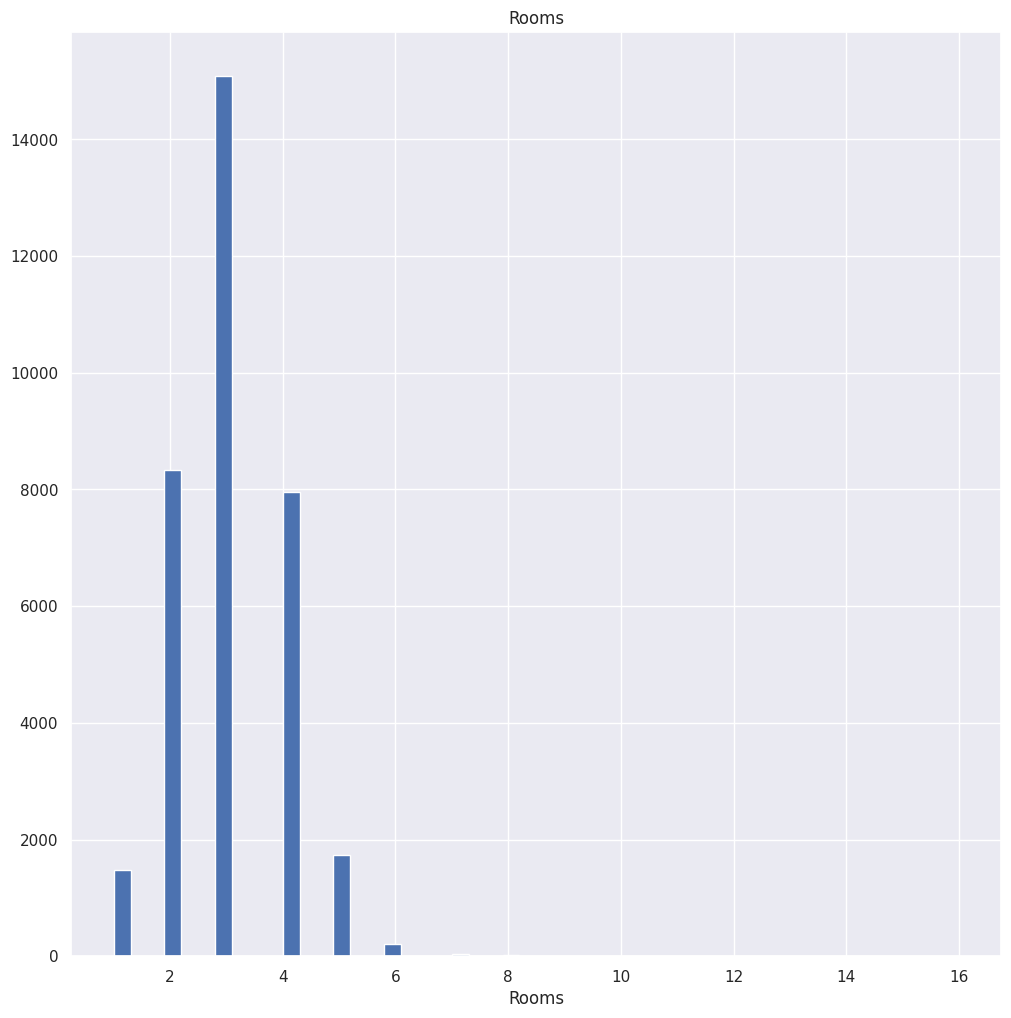

#####################################
count      27247.00
mean     1050173.34
std       641467.13
min        85000.00
5%        415000.00
10%       485300.00
20%       594600.00
30%       678000.00
40%       770000.00
50%       870000.00
60%      1000000.00
70%      1200000.00
80%      1400000.00
90%      1800000.00
95%      2250000.00
99%      3400540.00
max     11200000.00
Name: Price, dtype: float64


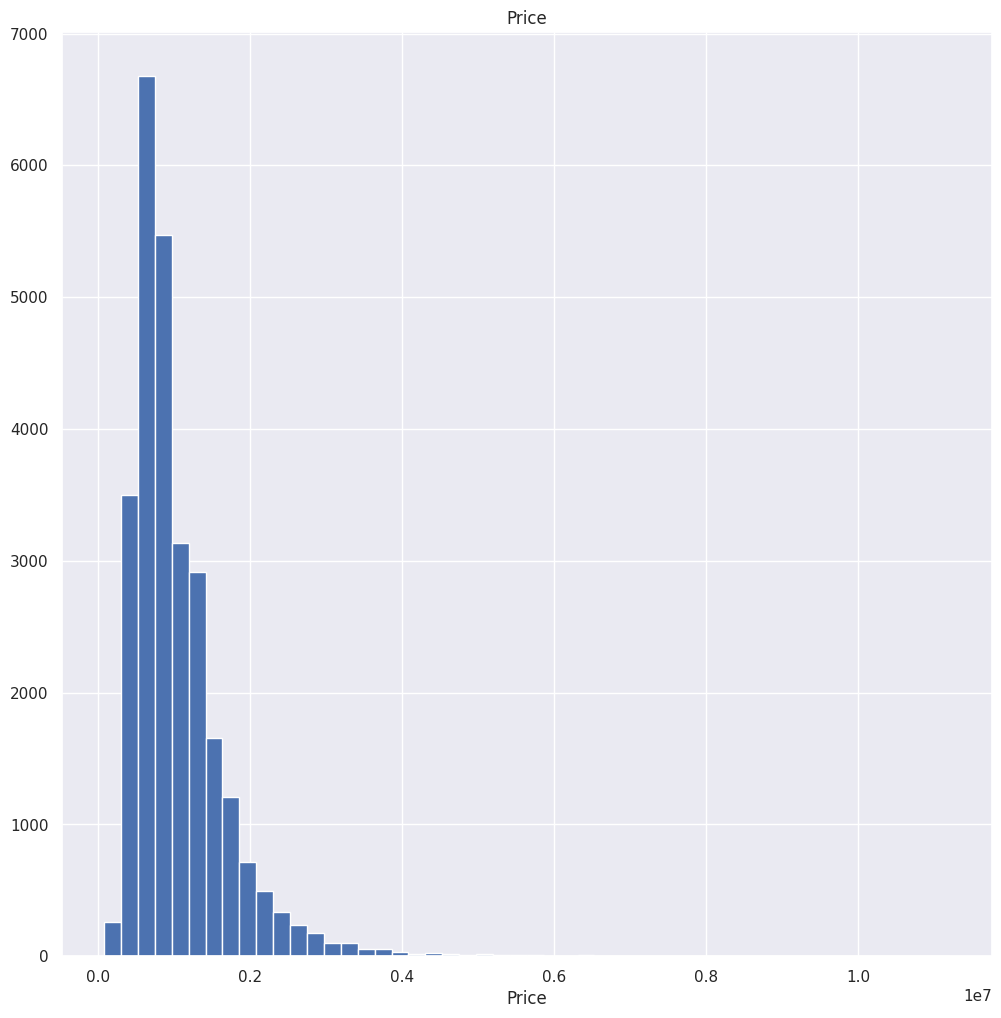

#####################################
count   34855.00
mean       11.18
std         6.79
min         0.00
5%          2.70
10%         3.80
20%         5.60
30%         7.30
40%         8.50
50%        10.30
60%        11.40
70%        13.40
80%        14.80
90%        19.90
95%        24.70
99%        35.40
max        48.10
Name: Distance, dtype: float64


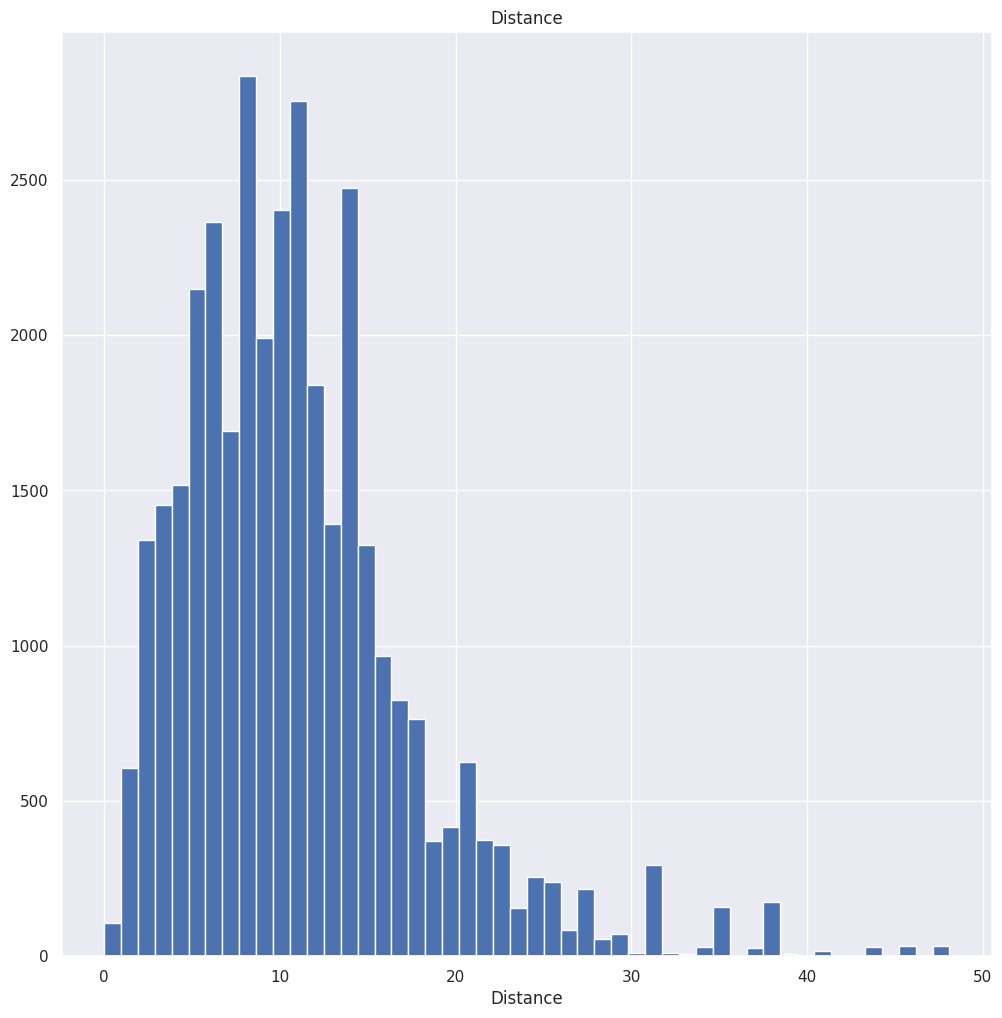

#####################################
count   34855.00
mean     3116.06
std       109.03
min      3000.00
5%       3015.00
10%      3024.00
20%      3042.00
30%      3058.00
40%      3073.00
50%      3103.00
60%      3125.00
70%      3146.00
80%      3168.00
90%      3190.00
95%      3204.00
99%      3754.00
max      3978.00
Name: Postcode, dtype: float64


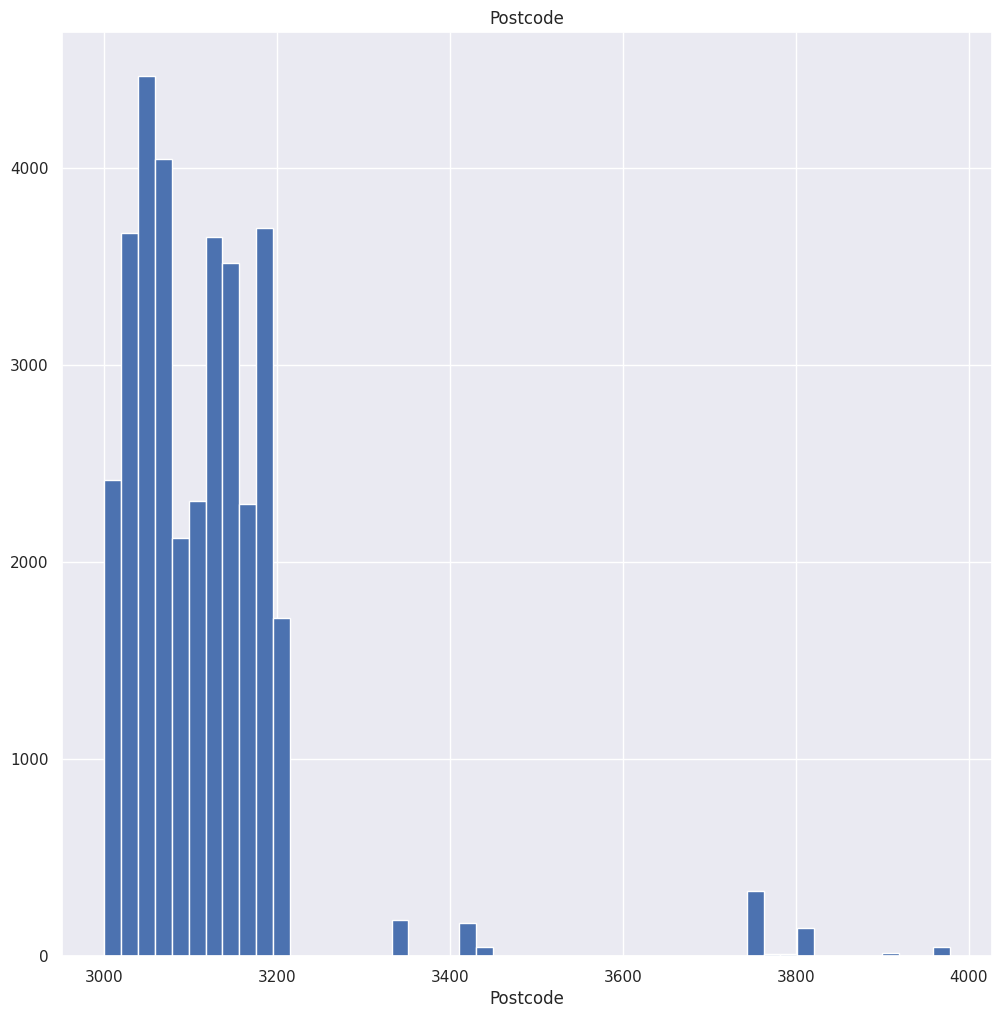

#####################################
count   26639.00
mean        3.08
std         0.98
min         0.00
5%          2.00
10%         2.00
20%         2.00
30%         3.00
40%         3.00
50%         3.00
60%         3.00
70%         4.00
80%         4.00
90%         4.00
95%         5.00
99%         5.00
max        30.00
Name: Bedroom2, dtype: float64


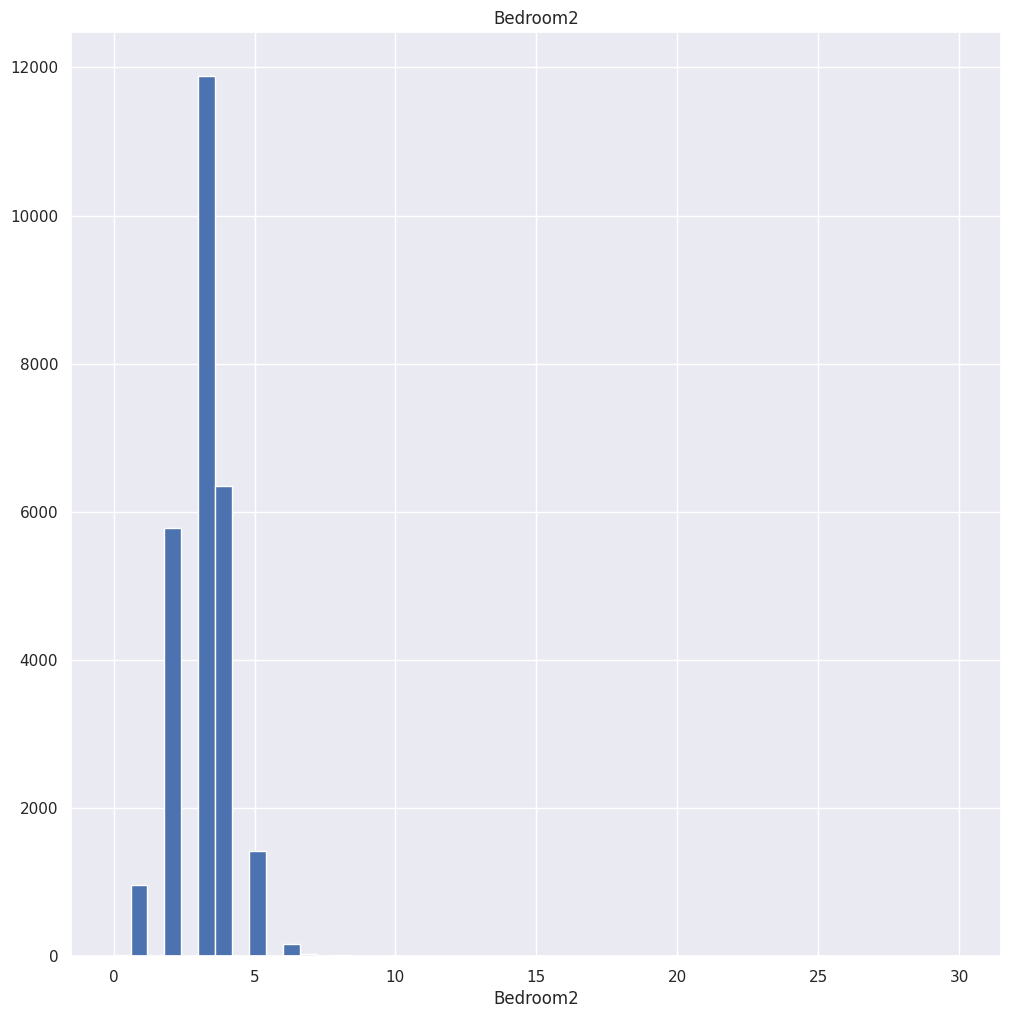

#####################################
count   26630.00
mean        1.62
std         0.72
min         0.00
5%          1.00
10%         1.00
20%         1.00
30%         1.00
40%         1.00
50%         2.00
60%         2.00
70%         2.00
80%         2.00
90%         2.00
95%         3.00
99%         4.00
max        12.00
Name: Bathroom, dtype: float64


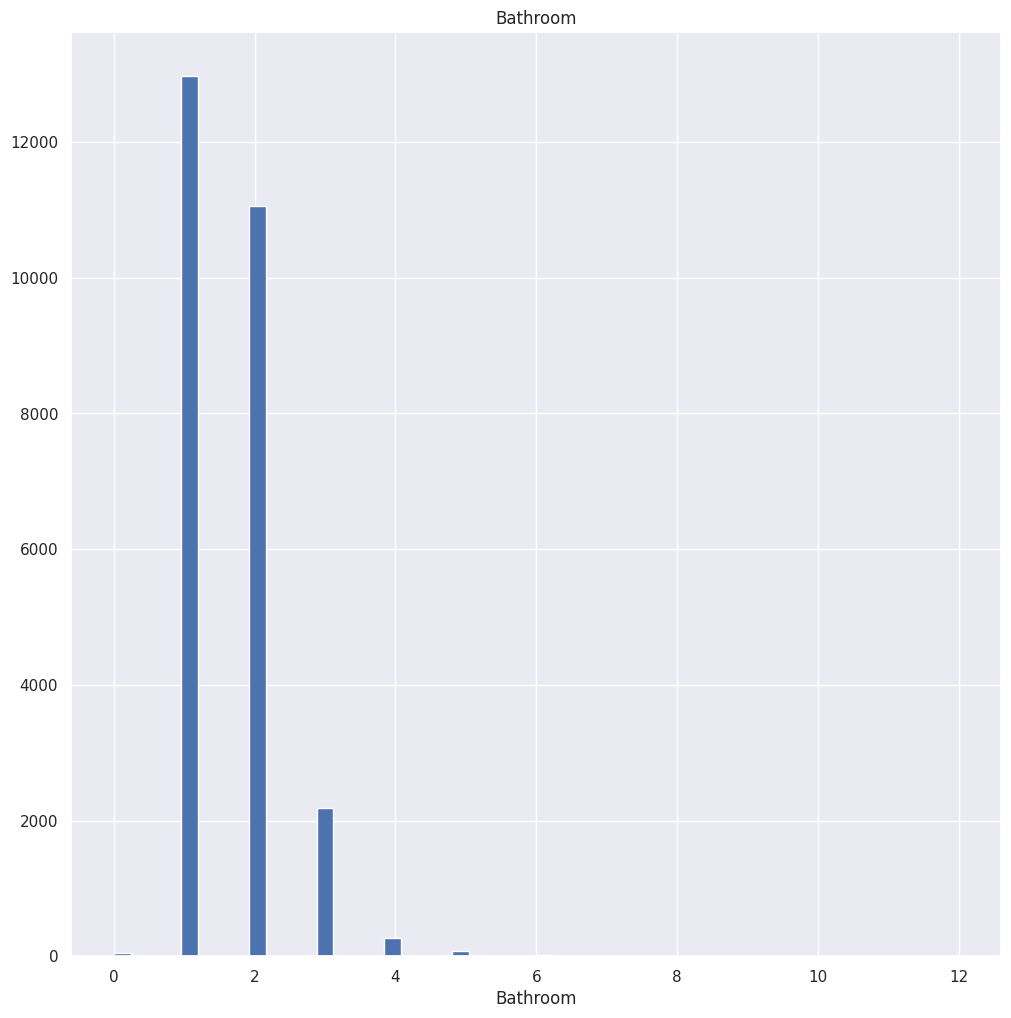

#####################################
count   26128.00
mean        1.73
std         1.01
min         0.00
5%          0.00
10%         1.00
20%         1.00
30%         1.00
40%         1.00
50%         2.00
60%         2.00
70%         2.00
80%         2.00
90%         3.00
95%         4.00
99%         5.00
max        26.00
Name: Car, dtype: float64


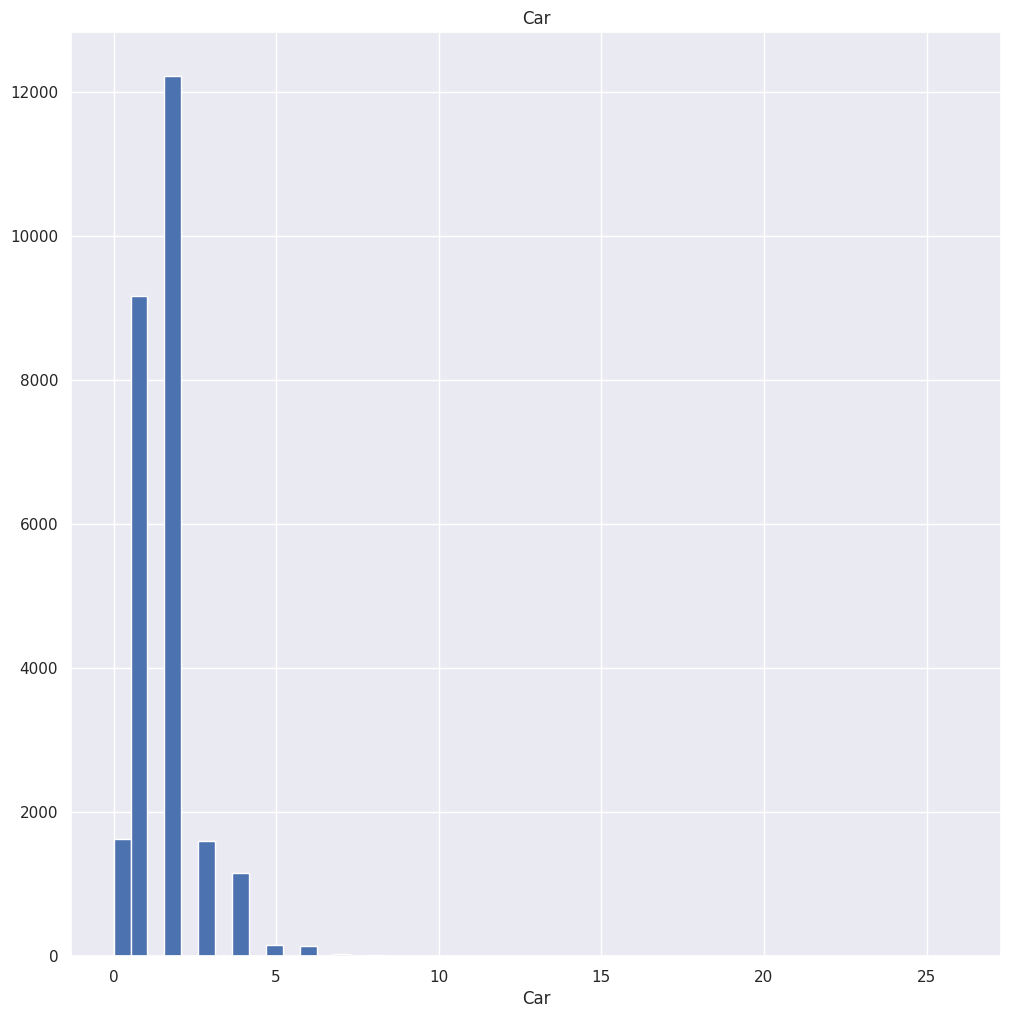

#####################################
count    23046.00
mean       593.61
std       3398.92
min          0.00
5%           0.00
10%          0.00
20%        179.00
30%        276.00
40%        385.00
50%        521.00
60%        587.00
70%        648.00
80%        702.00
90%        824.00
95%       1001.00
99%       2942.40
max     433014.00
Name: Landsize, dtype: float64


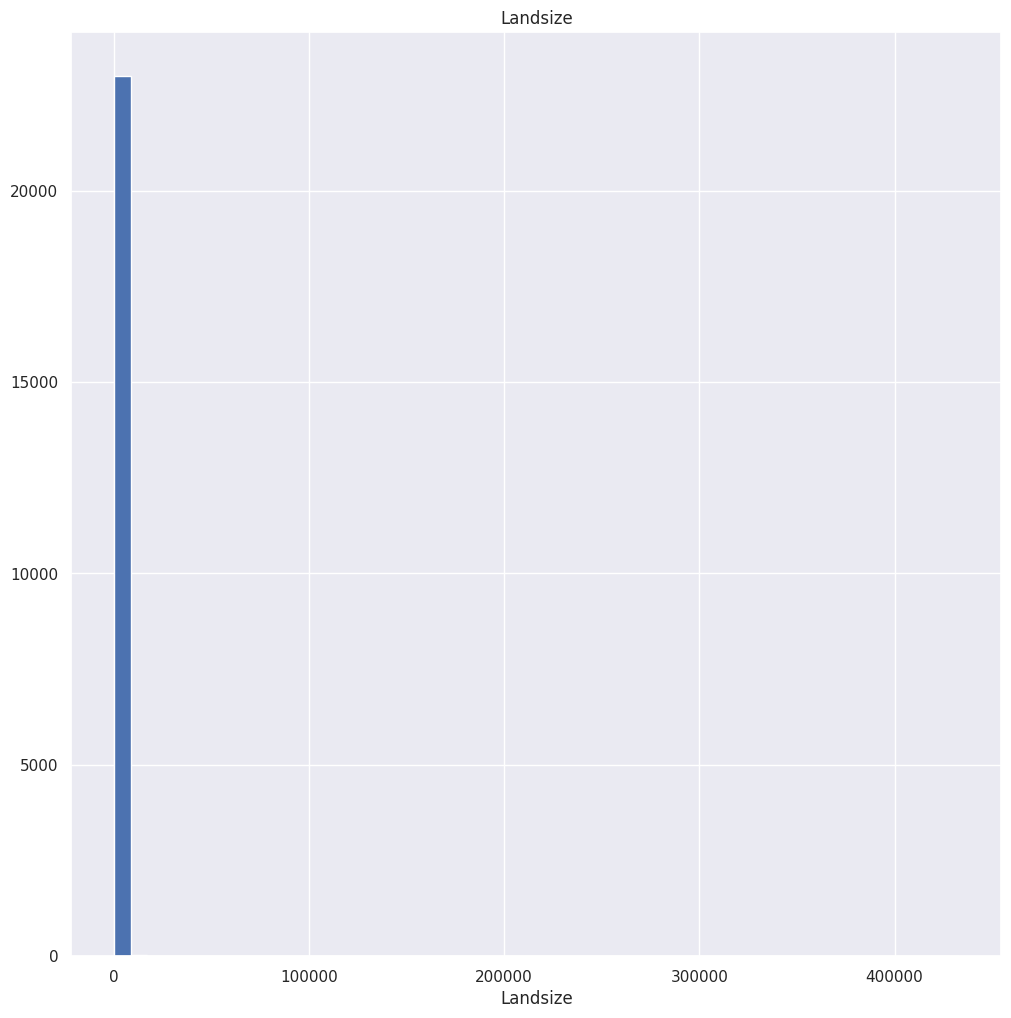

#####################################
count   13741.00
mean      160.25
std       401.28
min         0.00
5%         56.00
10%        73.00
20%        94.00
30%       109.00
40%       121.00
50%       136.00
60%       153.00
70%       175.00
80%       204.00
90%       258.00
95%       310.00
99%       473.20
max     44515.00
Name: BuildingArea, dtype: float64


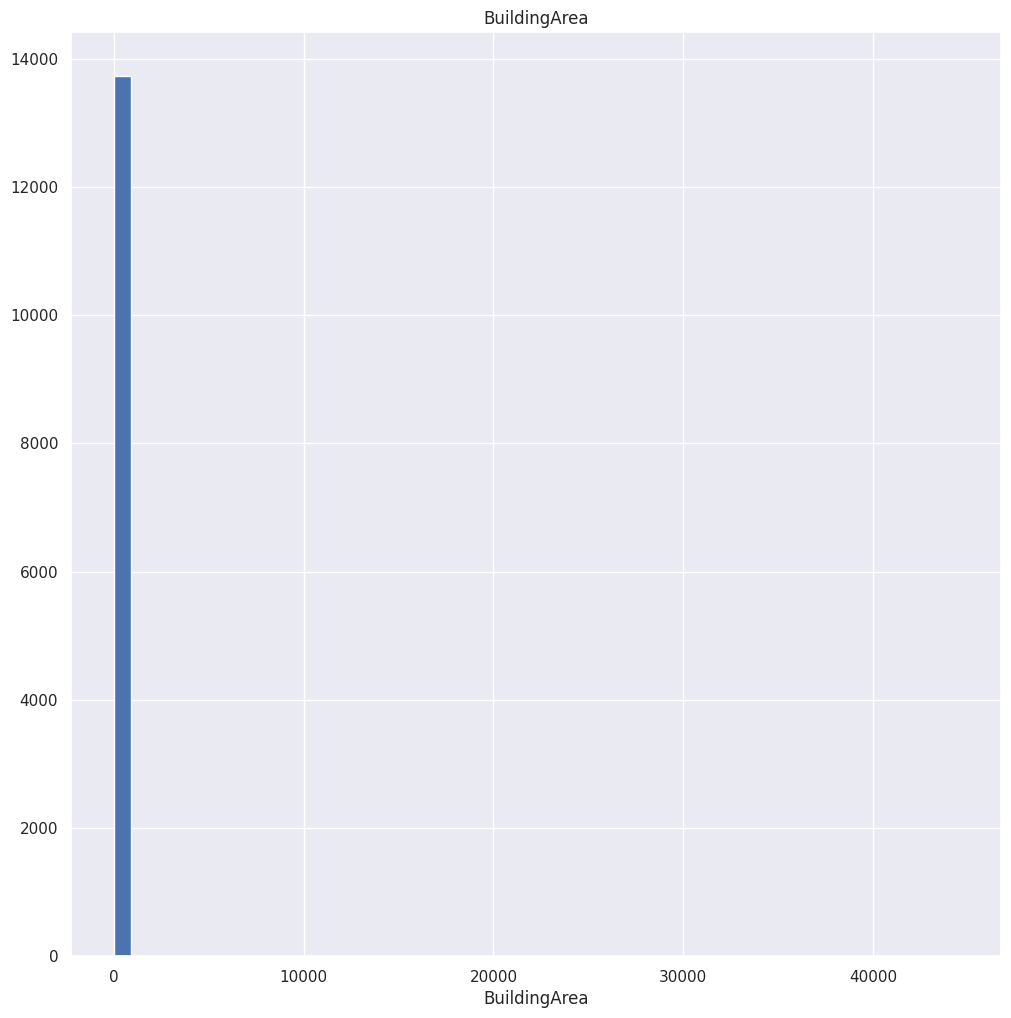

#####################################
count   15550.00
mean     1965.29
std        37.33
min      1196.00
5%       1900.00
10%      1910.00
20%      1930.00
30%      1950.00
40%      1960.00
50%      1970.00
60%      1980.00
70%      1993.00
80%      2003.00
90%      2010.00
95%      2013.00
99%      2016.00
max      2106.00
Name: YearBuilt, dtype: float64


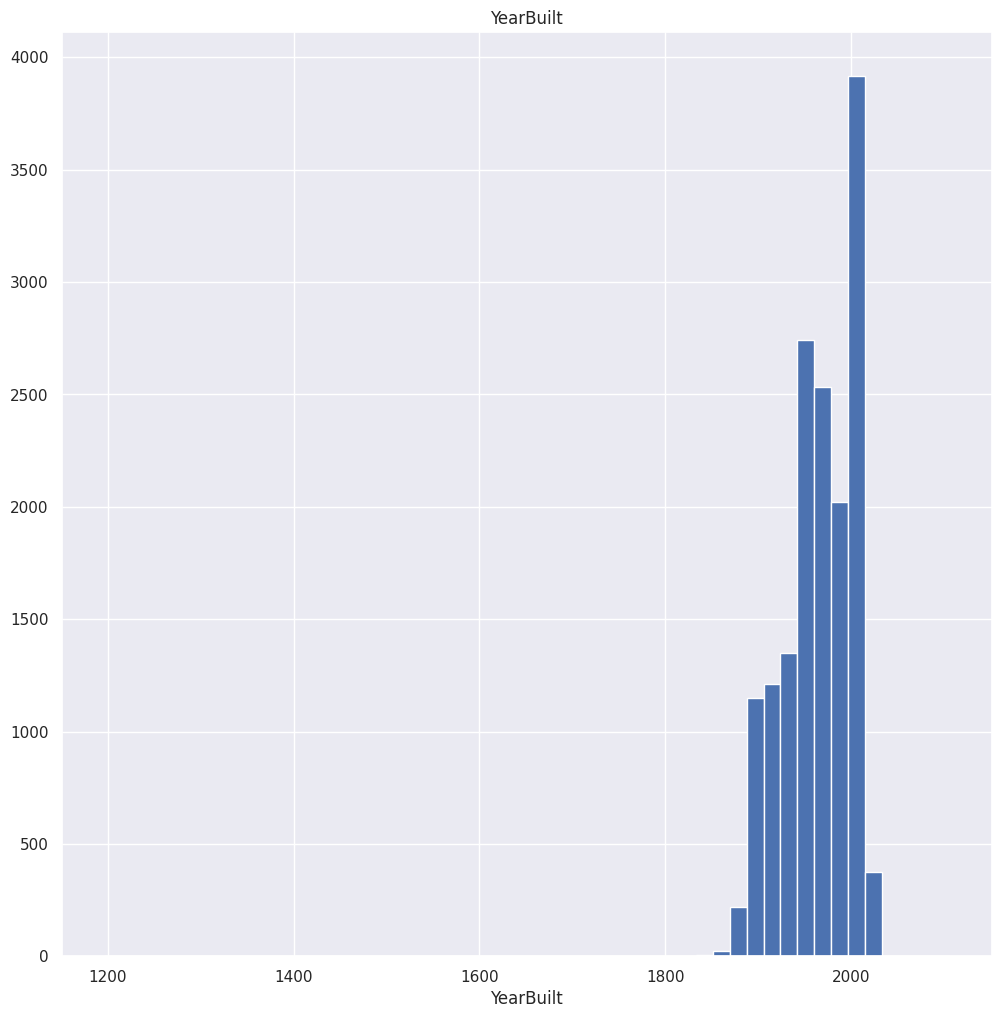

#####################################
count   26880.00
mean      -37.81
std         0.09
min       -38.19
5%        -37.95
10%       -37.92
20%       -37.88
30%       -37.85
40%       -37.83
50%       -37.81
60%       -37.79
70%       -37.77
80%       -37.74
90%       -37.71
95%       -37.68
99%       -37.59
max       -37.39
Name: Lattitude, dtype: float64


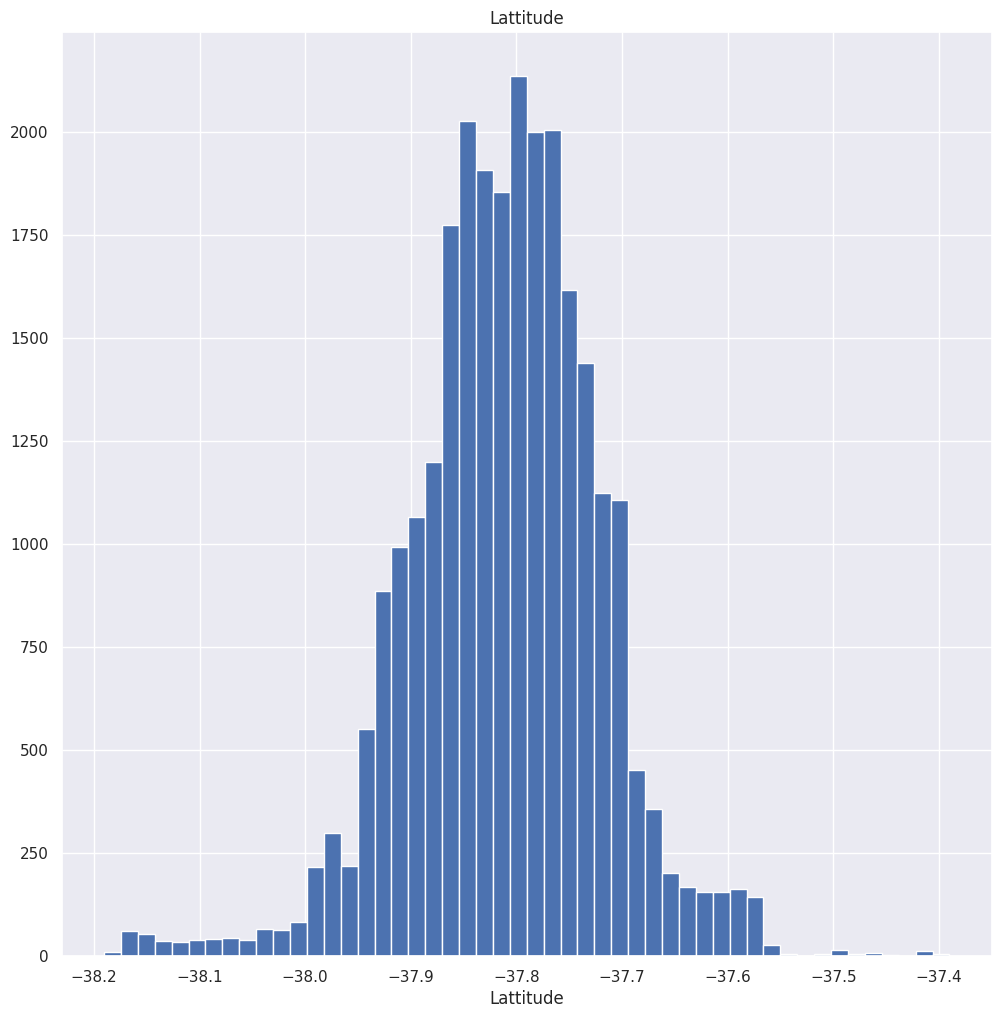

#####################################
count   26880.00
mean      145.00
std         0.12
min       144.42
5%        144.80
10%       144.87
20%       144.91
30%       144.95
40%       144.99
50%       145.01
60%       145.03
70%       145.06
80%       145.09
90%       145.14
95%       145.19
99%       145.29
max       145.53
Name: Longtitude, dtype: float64


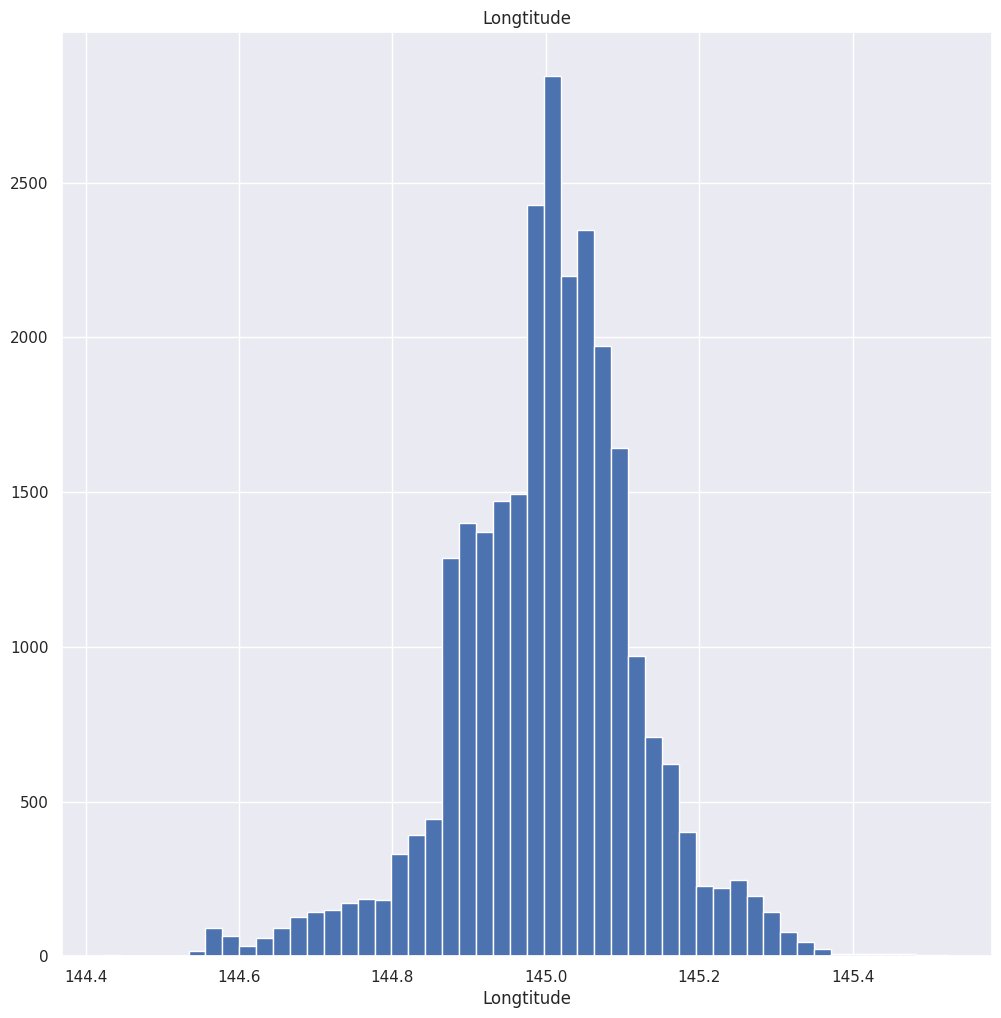

#####################################
count   34853.00
mean     7572.96
std      4428.13
min        83.00
5%       2185.00
10%      2674.00
20%      3650.00
30%      4836.00
40%      5556.00
50%      6763.00
60%      7809.00
70%      8989.00
80%     10969.00
90%     14577.00
95%     15510.00
99%     21650.00
max     21650.00
Name: Propertycount, dtype: float64


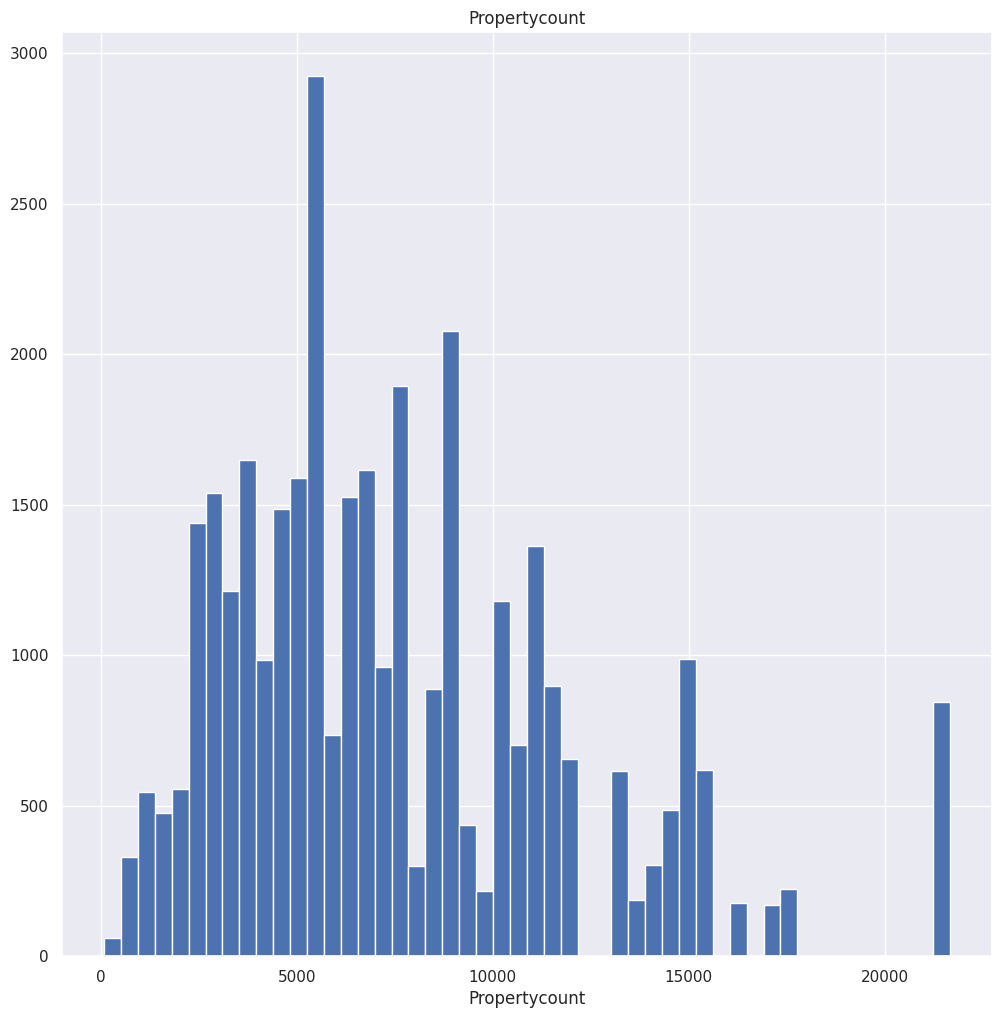

#####################################


In [41]:
######################################
# 3. Sayısal Değişken Analizi (Analysis of Numerical Variables)
######################################

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

    print("#####################################")


for col in num_cols:
    num_summary(df, col, True)


In [42]:
def outlier_thresholds(df, col_name, low_quantile=0.25, up_quantile=0.75):
    Q1 = df[col_name].quantile(low_quantile)
    Q3 = df[col_name].quantile(up_quantile)
    IQR = Q3 - Q1
    low_limit = Q1 - 1.5 * IQR
    up_limit = Q3 + 1.5 * IQR
    return low_limit, up_limit
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
for col in num_cols:
    print(col, check_outlier(df, col))

Rooms True
Price True
Distance True
Postcode True
Bedroom2 True
Bathroom True
Car True
Landsize True
BuildingArea True
YearBuilt True
Lattitude True
Longtitude True
Propertycount True


      TARGET_MEAN
Type             
h      1203718.50
t       931077.22
u       627943.42


        TARGET_MEAN
Method             
PI       1117883.99
PN              NaN
S        1051459.91
SA        982504.67
SN              NaN
SP        879022.37
SS              NaN
VB       1194205.29
W               NaN


                            TARGET_MEAN
Regionname                             
Eastern Metropolitan         1108723.00
Eastern Victoria              714328.20
Northern Metropolitan         861484.05
Northern Victoria             619051.20
South-Eastern Metropolitan    877682.68
Southern Metropolitan        1395928.33
Western Metropolitan          837615.32
Western Victoria              432606.77




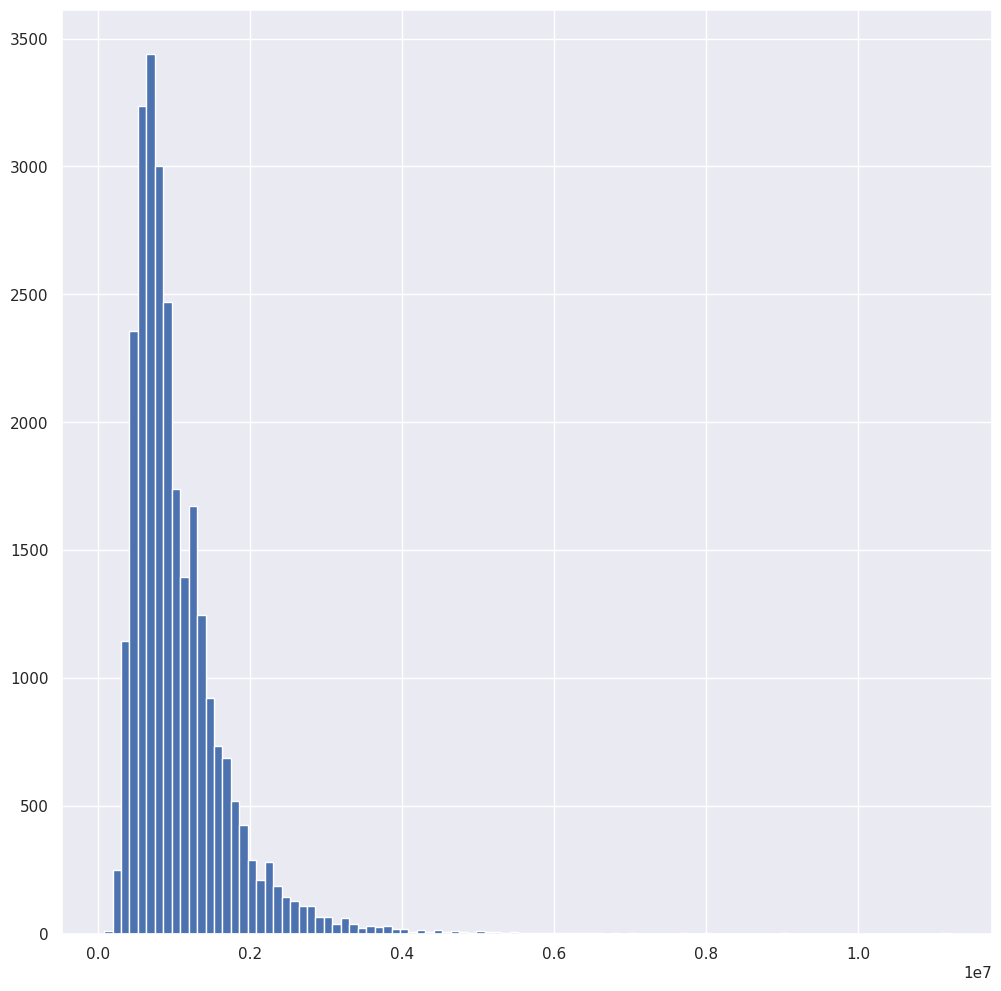

In [43]:

######################################
# 4. Hedef Değişken Analizi (Analysis of Target Variable)
######################################

def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")


for col in cat_cols:
    target_summary_with_cat(df,"Price",col)


# Bağımlı değişkenin incelenmesi
df["Price"].hist(bins=100)
plt.show()



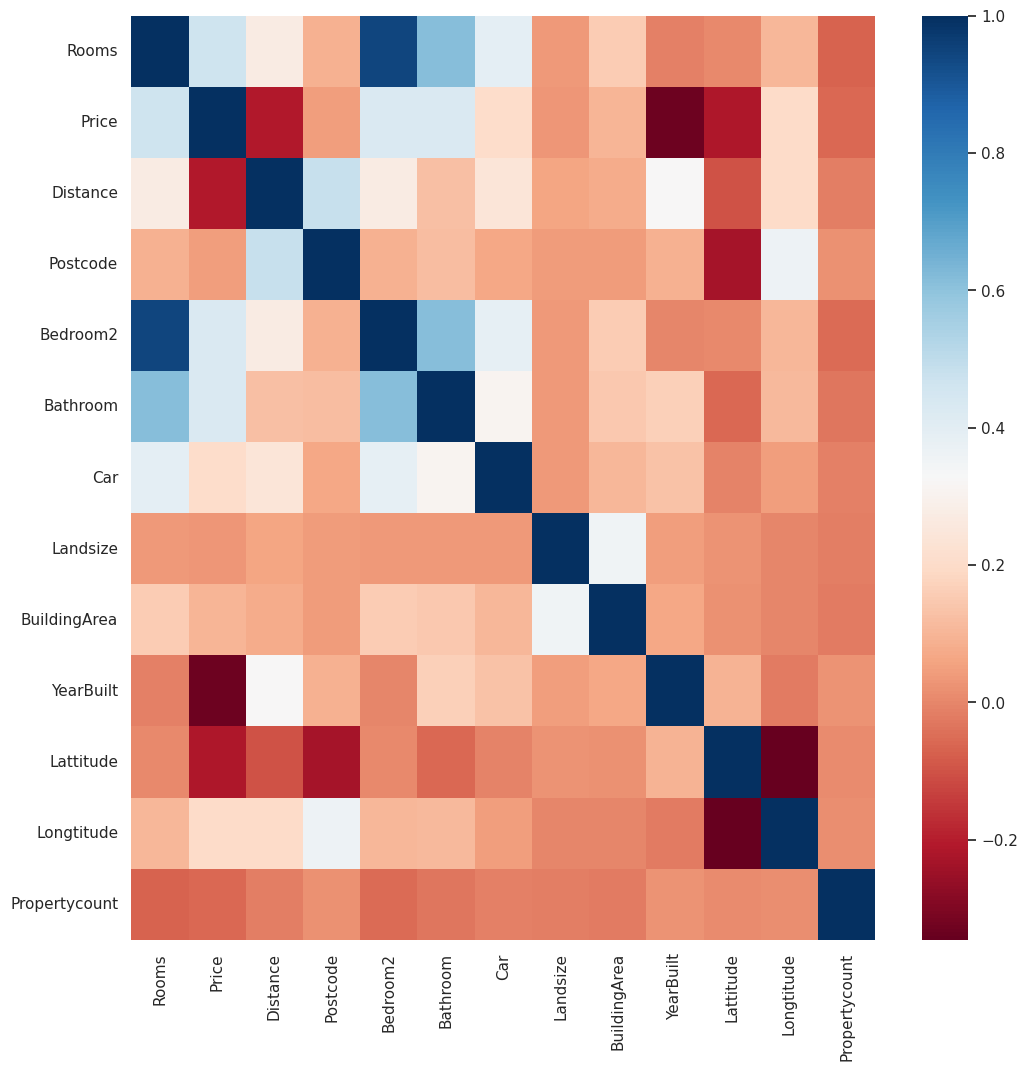

In [44]:
######################################
# 5. Korelasyon Analizi (Analysis of Correlation)
######################################

corr = df[num_cols].corr()
corr

# Korelasyonların gösterilmesi
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu")
plt.show()


In [45]:
######################################
# Aykırı Değer Analizi
######################################

# Aykırı değerlerin baskılanması
def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit


# Aykırı değer kontrolü
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


In [46]:

  # Aykırı değerlerin baskılanması
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit  

In [47]:
for col in num_cols:
    if col != "Price":
        replace_with_thresholds(df,col)

In [48]:
for col in num_cols:
    if col != "Price":
        print(col, check_outlier(df, col))


Rooms False
Distance False
Postcode False
Bedroom2 False
Bathroom False
Car False
Landsize False
BuildingArea False
YearBuilt False
Lattitude False
Longtitude False
Propertycount False


In [49]:

######################################
# Eksik Değer Analizi
######################################


def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(df)


               n_miss  ratio
BuildingArea    21115  60.58
YearBuilt       19306  55.39
Landsize        11810  33.88
Car              8728  25.04
Bathroom         8226  23.60
Bedroom2         8217  23.57
Lattitude        7976  22.88
Longtitude       7976  22.88
Price            7609  21.83
CouncilArea         3   0.01
Regionname          3   0.01
Propertycount       3   0.01
Distance            1   0.00
Postcode            1   0.00


In [50]:
#eksik değerlerin doldurulması   
for column in df.columns:
    df[column] = df[column].fillna(df[column].mode().iloc[0])

In [51]:
df.isnull().sum()
#hepsi doldurulmuş

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [52]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)
df = df.replace({True: 1, False: 0})
df.head()

,Suburb,Address,Rooms,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Propertycount,Type_t,Type_u,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,Abbotsford,68 Studley St,2,600000.00,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,120.00,1970.00,Yarra City Council,-37.80,145.00,4019.00,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,Abbotsford,85 Turner St,2,1480000.00,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,120.00,1970.00,Yarra City Council,-37.80,145.00,4019.00,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Abbotsford,25 Bloomburg St,2,1035000.00,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,4019.00,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Abbotsford,18/659 Victoria St,3,600000.00,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,120.00,1970.00,Yarra City Council,-37.81,145.01,4019.00,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,Abbotsford,5 Charles St,3,1465000.00,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,4019.00,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [53]:

one_hot_list = ["Suburb","Address","SellerG","Date","CouncilArea"]


def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, one_hot_list, drop_first=True)
df = df.replace({True: 1, False: 0})
df.head()


KeyboardInterrupt



In [ ]:

##################################
# MODELLEME
##################################

y = df["Price"]
X = df.drop("Price", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
print('Shape of x_train is {}'.format(X_train.shape))
print('Shape of x_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

In [ ]:
models = { 'Lasso': {'model': Lasso() },
'LinearRegression': {'model': LinearRegression()},
'Ridge': {'model': Ridge() },
'ElasticNet': {'model': ElasticNet()},
'KNeighborsRegressor': {'model': KNeighborsRegressor() },
'RandomForestRegressor': {'model': RandomForestRegressor()},
'GradientBoostingRegressor': {'model': GradientBoostingRegressor() },
'AdaBoostRegressor':{'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)}}


In [ ]:
for name, model_info in models.items():
    model = model_info['model']
    cv_results = cross_validate(model, X, y, cv=10, scoring=['accuracy', 'f1', 'roc_auc', 'precision', 'recall'])
    print(f'########## {name} ##########')
    print(f'Accuracy: {round(cv_results["test_accuracy"].mean(), 4)}')
    print(f'Auc: {round(cv_results["test_roc_auc"].mean(), 4)}')
    print(f'Recall: {round(cv_results["test_recall"].mean(), 4)}')
    print(f'Precision: {round(cv_results["test_precision"].mean(), 4)}')
    print(f'F1: {round(cv_results["test_f1"].mean(), 4)}')
